We write a Python program to solve the IVP $y' = y\sin(t)$ with $y(1)= 1$ on the interval $[1,4\pi]$, with a step size of $h=0.25$ using Euler's method.

In [4]:
def f(y, t):
    return y*sin(t)

In [2]:
def euler (f, t0, y0, h, tmax):
    t, y = t0, y0
    td, yd = [t0], [y0]
    while t < tmax:
        y = y + h*f(y, t)
        yd.append(y)
        t = t + h
        td.append(t)
    return(zip(td,yd))

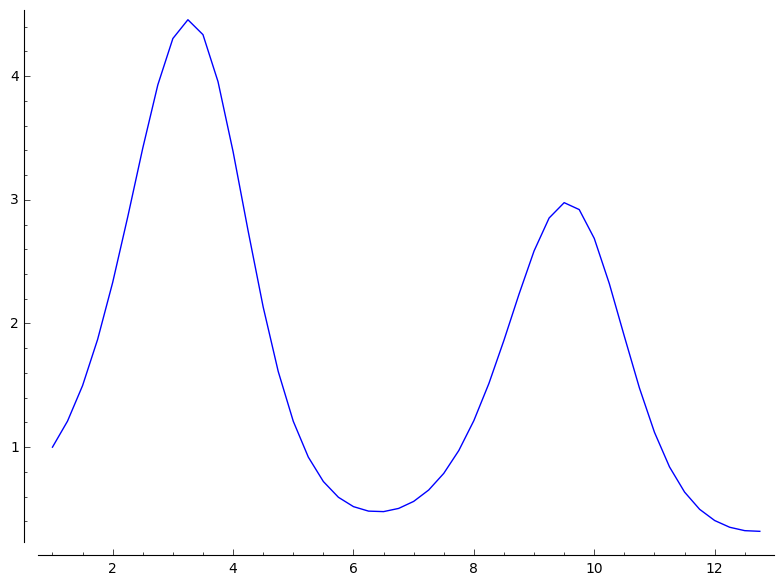

In [3]:
list_plot(euler(f,1,1,0.25,4*pi), plotjoined=True)

Now we plot our approximation against the slope field.

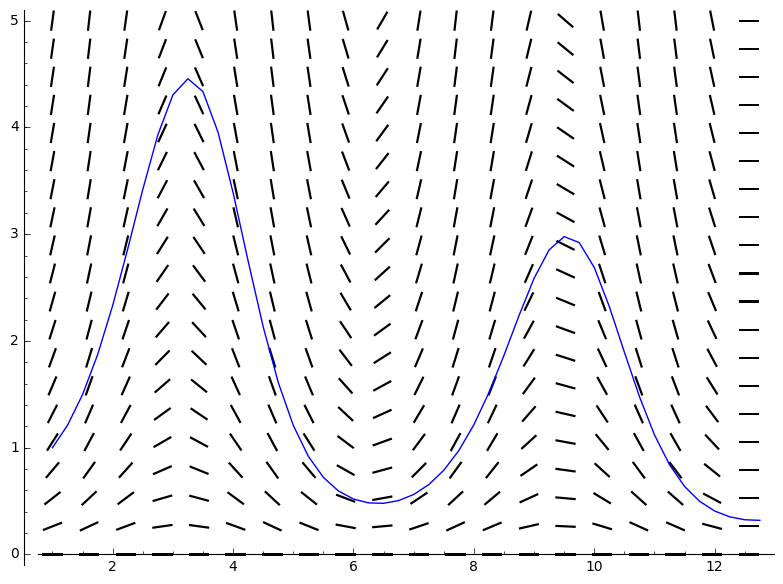

In [6]:
y, t = var('y t')
apprx = list_plot(euler(f,1,1,0.25,4*pi), plotjoined=True)
slope = plot_slope_field(y*sin(t), (t,1,4*pi), (y,0,5))
plot(apprx + slope)

As the time interval becomes very large, we see that our approximation flattens out.

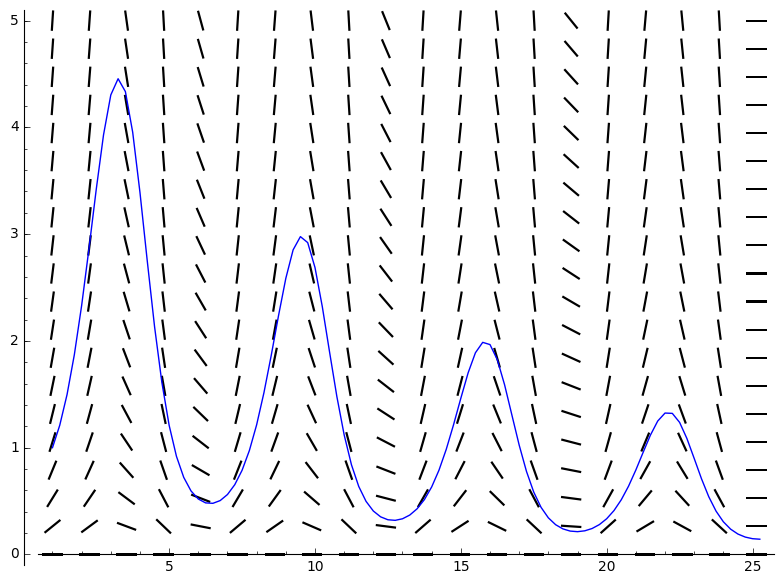

In [7]:
apprx = list_plot(euler(f,1,1,0.25,8*pi), plotjoined=True)
slope = plot_slope_field(y*sin(t), (t,1,8*pi), (y,0,5))
plot(apprx + slope)

We could perhaps improve our approximation by decreasing the step size?

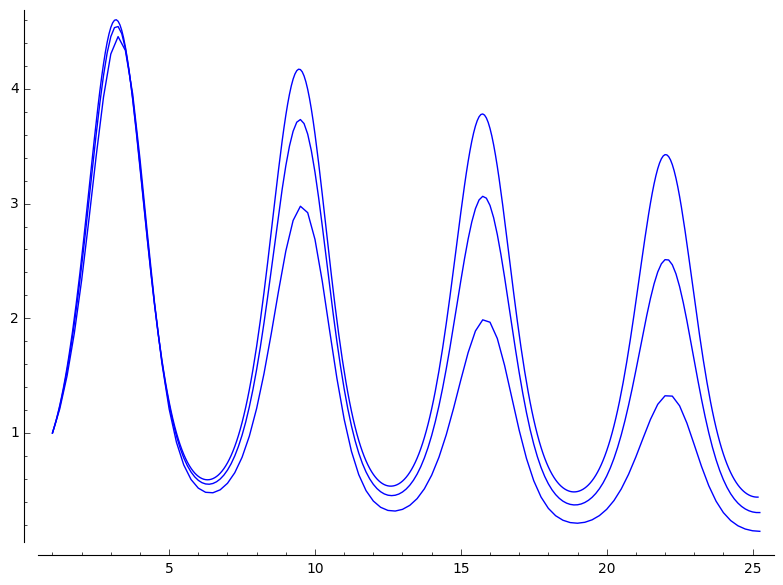

In [9]:
sum([list_plot(euler(f,1,1,h,8*pi), plotjoined=True) for h in [0.25,0.125,0.0625]])

Let's modify Euler's method to average the slopes found at two sides of a step size interval. We'll call it the **Improved Euler Method**, which is a type of **predictor-corrector** method. 

In [10]:
def imp_euler (f, t0, y0, h, tmax):
    t, y = t0, y0
    td, yd = [t0], [y0]
    while t < tmax:
        u = y + h*f(y, t)
        y = y + (h/2)*(f(y, t) + f(u, t + h))
        yd.append(y)
        t = t + h
        td.append(t)
    return(zip(td,yd))

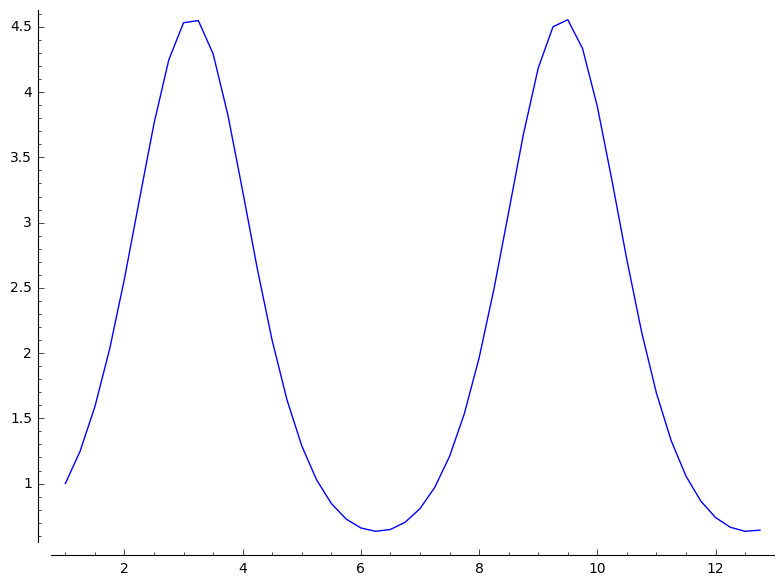

In [11]:
list_plot(imp_euler(f,1,1,0.25,4*pi), plotjoined=True)

A much better approximation. Let's look at the solution accross a larger time frame.

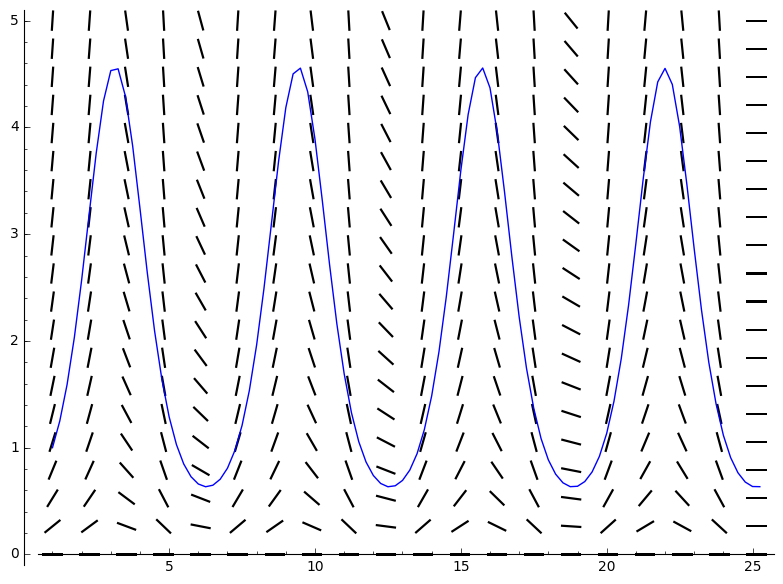

In [12]:
apprx = list_plot(imp_euler(f,1,1,0.25,8*pi), plotjoined=True)
slope = plot_slope_field(y*sin(t), (t,1,8*pi), (y,0,5))
plot(apprx + slope)

How much does our approximation improve when when decrease the step size by half?

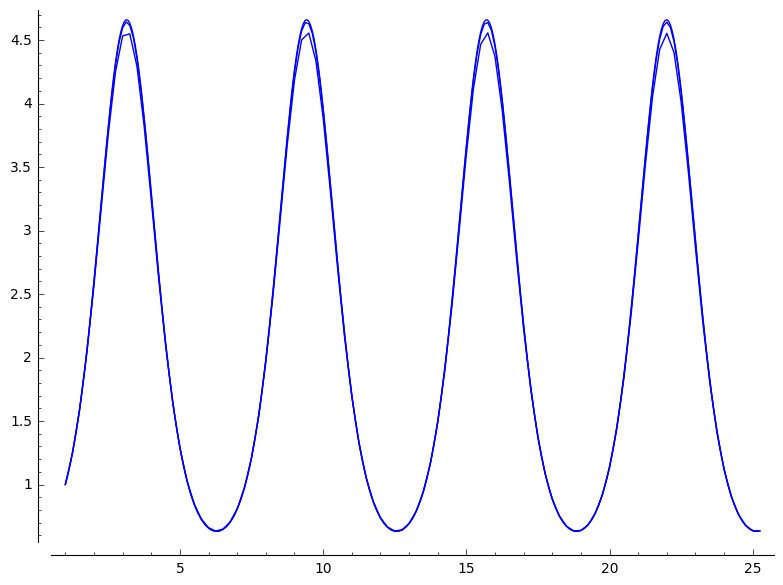

In [16]:
sum([list_plot(imp_euler(f,1,1,h,8*pi), plotjoined=True) for h in [0.25, 0.125, 0.0625]])

Not much. I'd use the second approx if I was to worry about computational resources.